## Oppstart

### Preamble

Contains imports and some utility code.

In [1]:
from dhlab.module_update import update, css, code_toggle

In [2]:
import dhlab.graph_networkx_louvain as gnl
import dhlab.nbtext as nb
import networkx as nx
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
css()

In [5]:
def frame_sort(frame, by=0):
    return frame.sort_values(by=by, ascending=False)

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Kollokasjoner eller assosiasjoner

Hvilke ord opptrer et ord sammen med innenfor et korpus? 

### Define a corpus

Bruk gjerne Dewey eller temaord for å definere korpuset, hold det forholdsvis lite rundt 200 bøker.

In [7]:
collword = 'lemmet'

In [8]:
korpus = nb.book_urn(words=[collword], ddk='8%', period=(1960, 2020), limit=500)
len(korpus)

500


Kommandoen nb.frame() kan benyttes på en hel del output. Gir en fin oversikt over data, og kan brukes .head() for å se de første eksemplene.



In [9]:
nb.frame(korpus).head(10)

,0,1,2,3
0,2010052503010,"Wang, Lulu",Liljeteatret,1997
1,2013120206139,"Cooper, Glenn",De dødes bibliotek,2009
2,2013012407285,"Brekke, Paal",Dikt 1949-1972,1978
3,2013042405085,"Chamberlain, Diane",hemmelig liv,2008
4,2009012804026,"Mysen, Jane",Livsmot,2002
5,2012091708032,"Fønhus, Mikkjel",Der villmarka suser,1976
6,2014082708026,"Øverland, Arnulf",Samlede dikt,2011
7,2013013108003,"Vizinczey, Stephen",Hyllest til den modne kvinnen,2012
8,2014010708130,"Mankell, Henning",Vindens sønn,2006
9,2013012508004,"Bull-Hansen, B. Andreas",Ragnarok,2012


In [10]:
nb.urn_concordance(word=collword, urns=korpus)

"Liljeteatret, Wang, Lulu, 1997",som ikke holder styr på,lemmet,sitt ! »
"De dødes bibliotek, Cooper, Glenn, 2009",Übertus presset,lemmet,inn . Hun gispet og
"Dikt 1949-1972, Brekke, Paal, 1978","jeg , som ned mot",lemmet,mitt stå opp og gå
"Dikt 1949-1972, Brekke, Paal, 1978",og gnisset,lemmet,sårt
"Dikt 1949-1972, Brekke, Paal, 1978",bare akkurat da Hun tar,lemmet,"hans i hånden , fort"
"hemmelig liv, Chamberlain, Diane, 2008","hans , presset det stive",lemmet,mot kinnet sitt . Han
"Livsmot, Mysen, Jane, 2002",seg ... magemusklene strammes ...,lemmet,er sprekkeferdig av kåthet .
"Livsmot, Mysen, Jane, 2002",. Hendene hennes griper om,lemmet,"hans , og han ser"
"Livsmot, Mysen, Jane, 2002",idet hun tar tak om,lemmet,hans og drar ... masserer
"Livsmot, Mysen, Jane, 2002",ham og skjødet som omslutter,lemmet,. Aldri har han kjent
"Livsmot, Mysen, Jane, 2002",og Aile sanser rykningene i,lemmet,. Makens ansikt er fordreid


## Lager kollokasjoner fra korpuset

Et skrittvis eksempel. 
1. Bygg kollokasjonen
2. Finn en referanse
3. Sammenlign kollokasjon med referanse

### Bygg kollokasjon

Kommandoen er `urn_coll()`. Legg gjerne inn en sjekk med konkordans.

Så kan vi hente ut selve kollokasjonen,dvs. ord som står innenfor en viss avstand fra målordet.

In [11]:
small_window = 5
large_window = 10

In [12]:
def collpart(collword, urns, win = 5, limit = 10000):
    return nb.urn_coll(collword, urns = korpus, after = win, before = win, limit = 10000)

Kollokasjonen er en såkalt **dataframe** som kan undersøkes med `.head()` som ovenfor.

In [13]:
small = collpart(collword, nb.pure_urn(korpus), win = 5)
large = collpart(collword, nb.pure_urn(korpus), win = 10)



## Finn referanse

Det er flere måter å sammenligne på. En er å bruke bokhylla selv om som referanse. For å hente ut ord fra bokhylla brukes kommandoen `totals(<antall ord>)`. Korpuset selv kan også benyttes, for eksempel med kommandoen `aggregate_urns(<korpusdefinisjon>)`.



#### Sammenlign

Vi har nå tre frekvenslister som kan sammenlignes med hverandre. For å lette sammenlign normaliseres dem. Kommandoen for normalisering er `normalize_corpus_dataframe(<frekvensliste>)`

nb.normalize_corpus_dataframe(korpus_agg)
nb.normalize_corpus_dataframe(tot)
nb.normalize_corpus_dataframe(small)
nb.normalize_corpus_dataframe(large)

Inspiser dataene etter normalisering

### Kollokasjonen

In [14]:
small.head()

,0
",",823
.,815
og,754
det,680
hans,659


In [15]:
large.head()

,0
.,1728
",",1655
og,1381
det,982
hans,794


Kollokasjonen *coll* har gjennomgående høyere verdier, noe som sannsynligvis skyldes at det er færre ord.

#### Utfør sammenligning

For sammenligning måles forskjellen på *coll* med referansen. Forskjellen måles ved å dividere hvert ords frekvens ikollokasjonen på frekvensen ordet har i referansen.

$$\textrm{assosiasjons-styrke}(w) = \frac{\textrm{coll}(w)}{\textrm{referanse}(w)}$$

Divisjonen pr.ord gjøres av Python - resultat sorteres og legges i variabelen `coll_assoc`

In [16]:
delta = pd.DataFrame()

In [17]:
delta['small'] = small[0]
delta['large'] = large[0]

In [18]:
delta['ratio'] = small[0]/large[0]

In [19]:
#delta['log'] = np.log(delta['ratio'])

In [20]:
#delta['score'] = delta['ratio'] * delta['log']

In [21]:
delta[(delta['small'] > 2) & (delta['ratio'] > 0.6)].sort_values(by='ratio', ascending=False)

,small,large,ratio
ytterst,5,5,1.000000
Hendene,4,4,1.000000
meget,4,4,1.000000
selve,4,4,1.000000
bet,4,4,1.000000
...,...,...,...
dunket,5,8,0.625000
begynner,5,8,0.625000
får,5,8,0.625000
kjenner,8,13,0.615385


In [22]:
delta.loc[[',','.','og','!', '?']]

,small,large,ratio
",",823,1655,0.497281
.,815,1728,0.471644
og,754,1381,0.545981
!,9,36,0.250000
?,55,125,0.440000


In [23]:
delta_max = delta[delta.small < delta.large][delta.small > 0][delta.ratio > 0.6].sort_values(by='ratio', ascending=False)

In [24]:
delta_const = delta[delta.small > 2][delta.ratio > 0.6].sort_values(by='ratio', ascending=False)

In [25]:
delta_max.head(20)

,small,large,ratio
stive,114,115,0.991304
sitt,148,154,0.961039
harde,99,104,0.951923
bankende,16,17,0.941176
slappe,24,26,0.923077
omsluttet,11,12,0.916667
svulmende,19,21,0.904762
mitt,57,64,0.890625
betraktet,8,9,0.888889
lange,16,18,0.888889


In [26]:
delta_const

,small,large,ratio
ytterst,5,5,1.000000
Hendene,4,4,1.000000
meget,4,4,1.000000
selve,4,4,1.000000
bet,4,4,1.000000
...,...,...,...
dunket,5,8,0.625000
begynner,5,8,0.625000
får,5,8,0.625000
kjenner,8,13,0.615385


In [27]:
delta_max.head(50).index

Index(['stive', 'sitt', 'harde', 'bankende', 'slappe', 'omsluttet',
       'svulmende', 'mitt', 'betraktet', 'lange', 'masserte', 'borti', 'taket',
       'liv', 'pulserende', 'kjenne', 'søkte', 'undersiden', 'legger', 'føle',
       'fylle', 'slanke', 'slapt', 'massive', 'føre', 'slippe', 'svulmet',
       'griper', 'hete', 'sprutet', 'roten', 'hans', 'tuppen', 'stivt',
       'spratt', 'pungen', 'ditt', 'hørte', 'kvinnens', 'Hvis', 'ganger',
       'Blodet', 'innsiden', 'leke', 'gripe', 'hett', 'fastere', 'følte',
       'hullet', 'inne'],
      dtype='object')

In [28]:
delta_const.head(50).index

Index(['ytterst', 'Hendene', 'meget', 'selve', 'bet', 'mektige', 'boret',
       'pumpet', 'banke', 'v', 'oppdaget', 'mere', 'unna', 'svulme', 'ferd',
       'dirrende', 'digre', 'Samtidig', 'trangt', 'voksende', 'Maus', 'vokse',
       'mannlige', 'min.', 'venusberget', 'dra', 'støte', 'blodfylte',
       'steinharde', 'krympet', 'dinglende', 'viste', 'frigjorde', 'Fatima',
       'veldige', 'altfor', 'puttet', 'Tyr', 'rykke', 'nådeløst', 'strittet',
       'vokst', 'sirkler', 'vakre', 'går', 'hev', 'vite', 'hennes,',
       'hengende', 'Ganske'],
      dtype='object')

# Visualiser med en ordsky


Visualiseringen trives best med tall mellom 0 og 1, så assosiasjonene divideres på summen av dem for å få til det. Ordskyene lages med kommonandoen `cloud(<data>)`. Pass på å ikke ta med alt for mange; det kan gi feilsituasjoner.

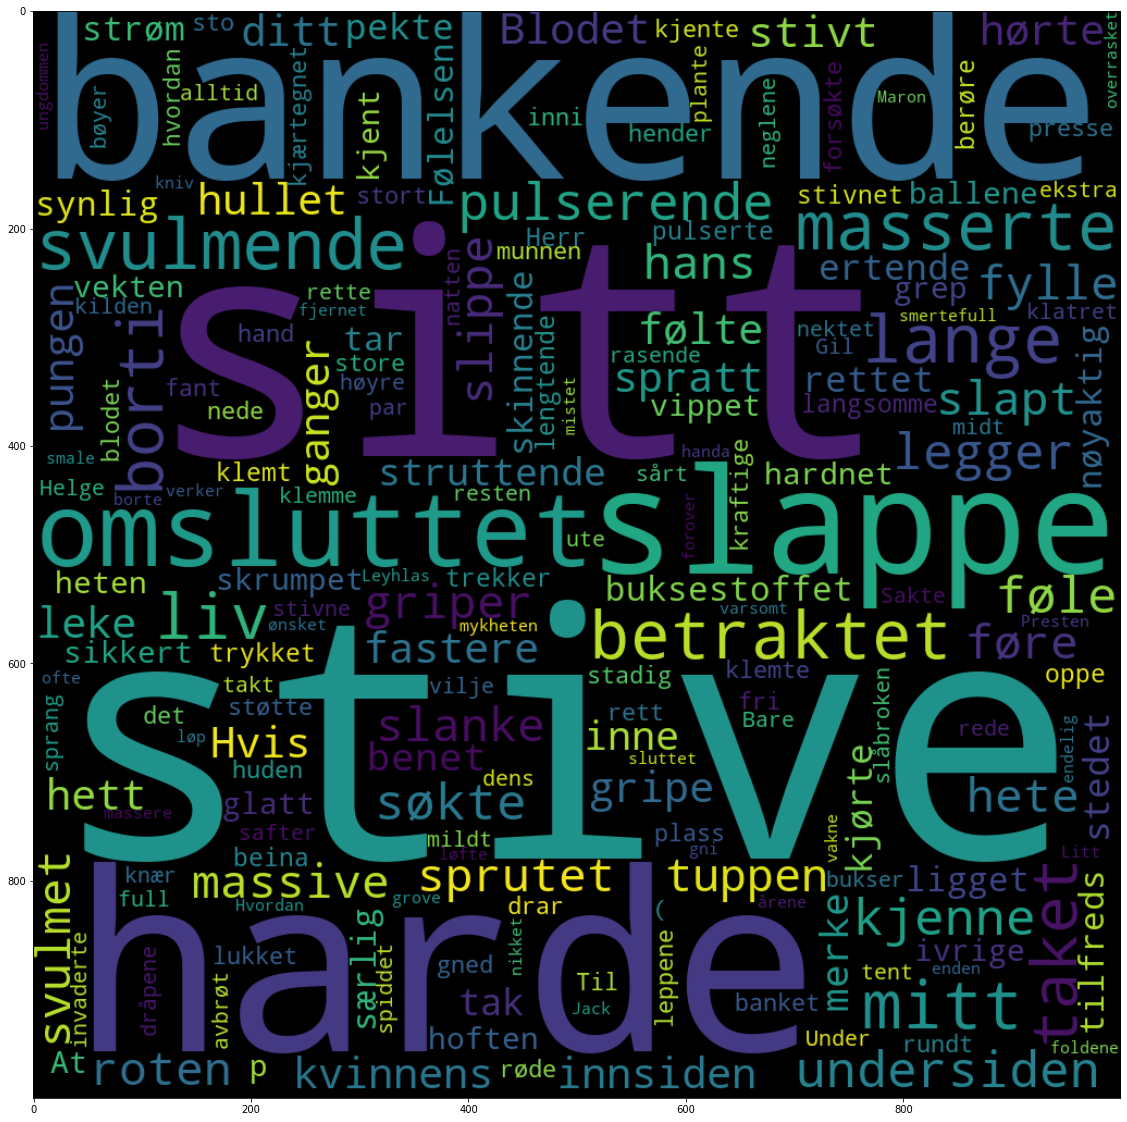

In [29]:
nb.cloud(nb.frame(delta_max.ratio))

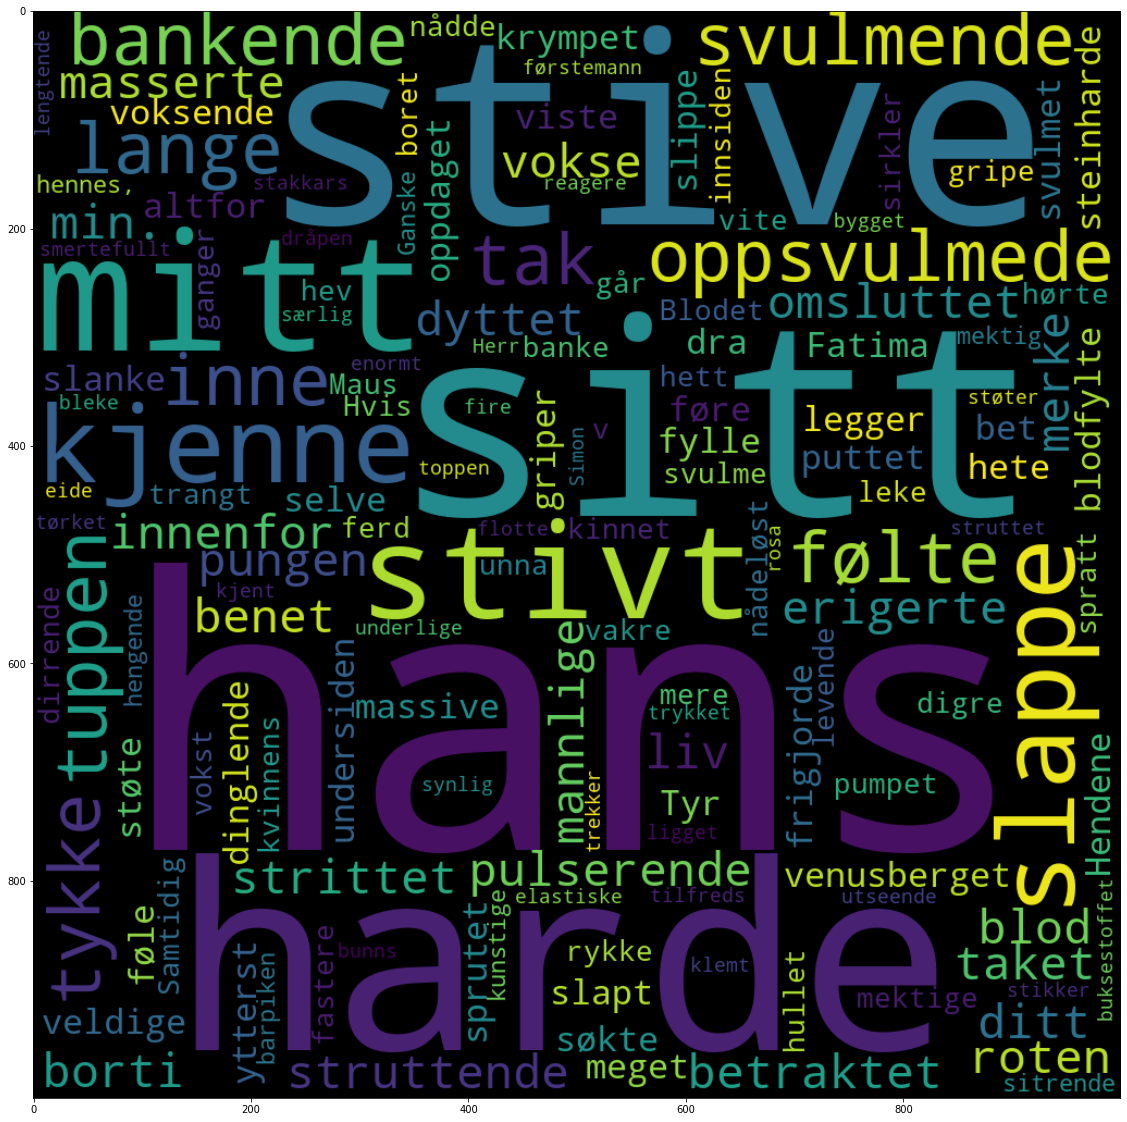

In [30]:
nb.cloud(nb.frame(delta_const.head(150).small/delta_const.small.sum()))